In [ ]:
## pip install matplotlib numpy librosa scipy noisereduce 

## Unzip the speech_data file parallel to this notebook.

In [1]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import noisereduce as nr
import soundfile as sf
import IPython
# import torch

/Users/pkamath/anaconda3/envs/eye_test_speech/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


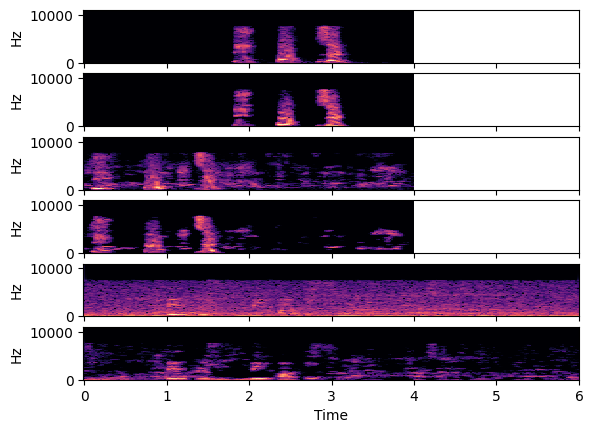

In [5]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)


y1, sr = librosa.load('speech_data/M1ENTest3TOZ_quiet.wav')
y1_nr = nr.reduce_noise(y=y1, sr=sr, n_fft=1024)
sf.write('speech_data/M1ENTest3TOZ_quiet+noisereduce.wav', y1_nr, sr)

y2, sr = librosa.load('speech_data/M1ENTest3TOZ_noisy.wav')
y2_nr = nr.reduce_noise(y=y2, sr=sr, n_fft=1024)
sf.write('speech_data/M1ENTest3TOZ_noisy+noisereduce.wav', y2_nr, sr)

y3, sr = librosa.load('speech_data/AFBR_LPED_crosstalk+noise.wav')
y3_nr = nr.reduce_noise(y=y3, sr=sr, n_fft=1024)
sf.write('speech_data/AFBR_LPED_crosstalk+noise+noisereduce.wav', y3_nr, sr)

for ind, y in enumerate([y1,y1_nr,y2,y2_nr,y3,y3_nr]):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax[ind])

IPython.display.display(IPython.display.Audio('speech_data/M1ENTest3TOZ_quiet.wav'))
IPython.display.display(IPython.display.Audio('speech_data/M1ENTest3TOZ_quiet+noisereduce.wav'))
IPython.display.display(IPython.display.Audio('speech_data/M1ENTest3TOZ_noisy.wav'))
IPython.display.display(IPython.display.Audio('speech_data/M1ENTest3TOZ_noisy+noisereduce.wav'))
IPython.display.display(IPython.display.Audio('speech_data/AFBR_LPED_crosstalk+noise.wav'))
IPython.display.display(IPython.display.Audio('speech_data/AFBR_LPED_crosstalk+noise+noisereduce.wav'))